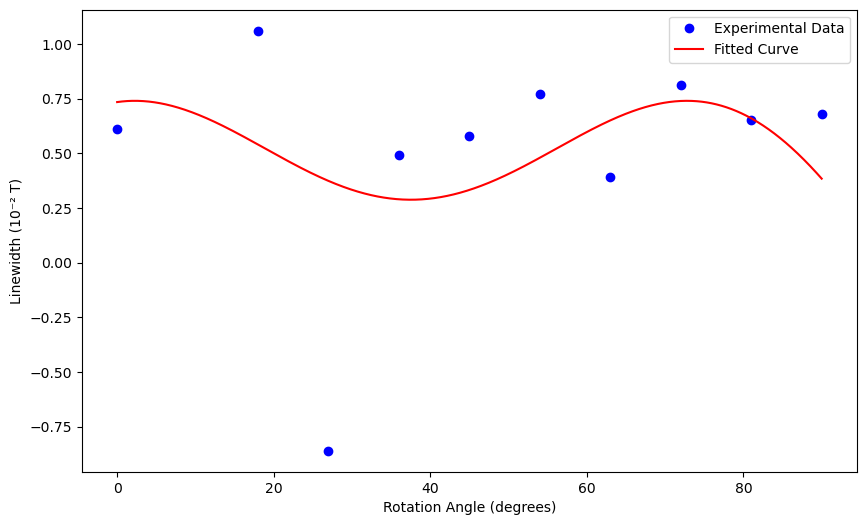

Fitted parameters:
A = -0.4520966776144202 × 10⁻² T
φ = -0.915910510673567 rad
B = 0.7395357671226257 × 10⁻² T


<Figure size 640x480 with 0 Axes>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given linewidth values (multiplied by 100 to show in 10^-2 T)
linewidths = np.array([0.0061, 0.0106, -0.0086, 0.0049, 0.0058, 0.0077, 0.0039, 0.0081, 0.0065, 0.0068]) * 100
# Corresponding angles in degrees
angles_deg = np.array([0, 18, 27, 36, 45, 54, 63, 72, 81, 90])
# Convert angles to radians
angles_rad = np.deg2rad(angles_deg)

# Define the fitting function
def fit_function(theta, A, phi, B):
    return A * (3 * np.cos(theta - phi)**2 - 1)**2 + B

# Perform the curve fitting
initial_guess = [1, 0, 0.5]  # Initial guess for A, phi, B
params, covariance = curve_fit(fit_function, angles_rad, linewidths, p0=initial_guess)

# Extract the fitted parameters
A_fit, phi_fit, B_fit = params

# Generate fitted linewidths for plotting
theta_continuous = np.linspace(0, np.pi/2, 1000)
fitted_linewidths = fit_function(theta_continuous, A_fit, phi_fit, B_fit)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.plot(angles_deg, linewidths, 'bo', label='Experimental Data')
plt.plot(np.rad2deg(theta_continuous), fitted_linewidths, 'r-', label='Fitted Curve')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Linewidth (10\u207b\u00b2 T)')
#plt.title('Linewidth vs. Rotation Angle with Fitted Curve')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print("A = " + str(A_fit) + " \u00d7 10\u207b\u00b2 T")
print("\u03c6 = " + str(phi_fit) + " rad")
print("B = " + str(B_fit) + " \u00d7 10\u207b\u00b2 T")
plt.savefig("YMnS Linewidth Parameter Plot.png")

Fit Parameters:
A = 0.135 T
φ = -0.694 rad = -39.7 degrees
B = 8.322 T
R-squared = 0.0597


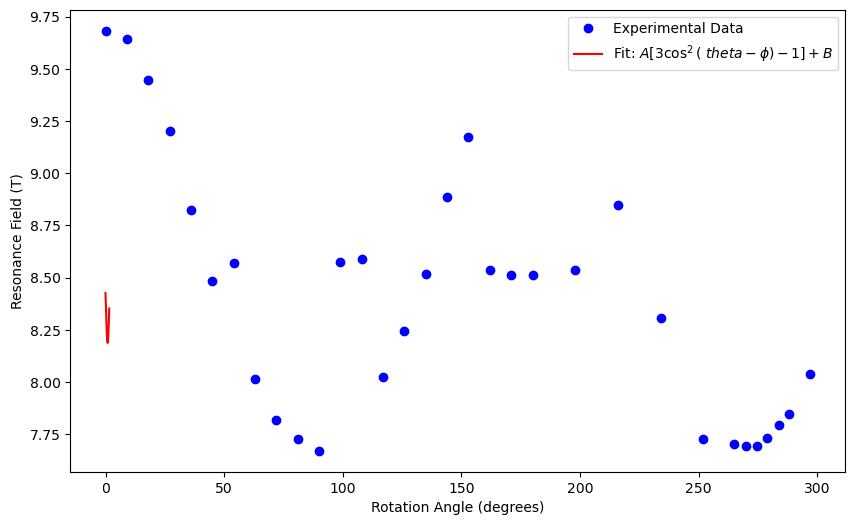

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Resonance field data (in radians for theta, Tesla for resonance field)
theta = np.array([0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 108, 117, 126, 135,
             144, 153, 162, 171, 180, 198, 216, 234, 252, 265, 270, 274.5, 279,
             284, 288, 297])  # in radians
resonance_field = np.array([9.682347316881001, 9.642017145777263, 9.444195623460924, 9.202285819948257,
                    8.823755518280622, 8.483945358092457, 8.56858356465433, 8.012201841731764,
                    7.819712294248432, 7.727209241187028, 7.670889984825133, 8.575219440066512,
                    8.587511639530215, 8.022241804907164, 8.24388824837261, 8.51731631312792,
                    8.88484905675742, 9.17370667942137, 8.535080368506957, 8.510675537795485,
                    8.512338180469643, 8.537929788784158, 8.845689505228451, 8.307719235051222,
                    7.727574953989374, 7.702389840246726, 7.695895136529859, 7.6924283930867015,
                    7.7294634042760855, 7.79598565476783, 7.84576709608045, 8.036464431060923])  # in Tesla

# Define the fitting function
def fit_function(theta, A, phi, B):
    return A * (3*np.cos(theta - phi)**2 - 1) + B

# Perform the fit
initial_guess = [1, 0, 8]  # Initial parameters guess
popt, pcov = curve_fit(fit_function, theta, resonance_field, p0=initial_guess)

# Generate smooth curve for plotting
theta_smooth = np.linspace(0, np.pi/2, 1000)
fit_curve = fit_function(theta_smooth, *popt)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(theta , resonance_field, 'bo', label='Experimental Data')
plt.plot(theta_smooth, fit_curve, 'r-', 
         label=r'Fit: $A[3\cos^2(\	theta - \phi) - 1] + B$')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Resonance Field (T)')
plt.legend()

# Print fit parameters
print("Fit Parameters:")
print(f"A = {popt[0]:.3f} T")
print(f"φ = {popt[1]:.3f} rad = {popt[1]*180/np.pi:.1f} degrees")
print(f"B = {popt[2]:.3f} T")

# Calculate R-squared
residuals = resonance_field - fit_function(theta, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((resonance_field - np.mean(resonance_field))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared = {r_squared:.4f}")

plt.show()

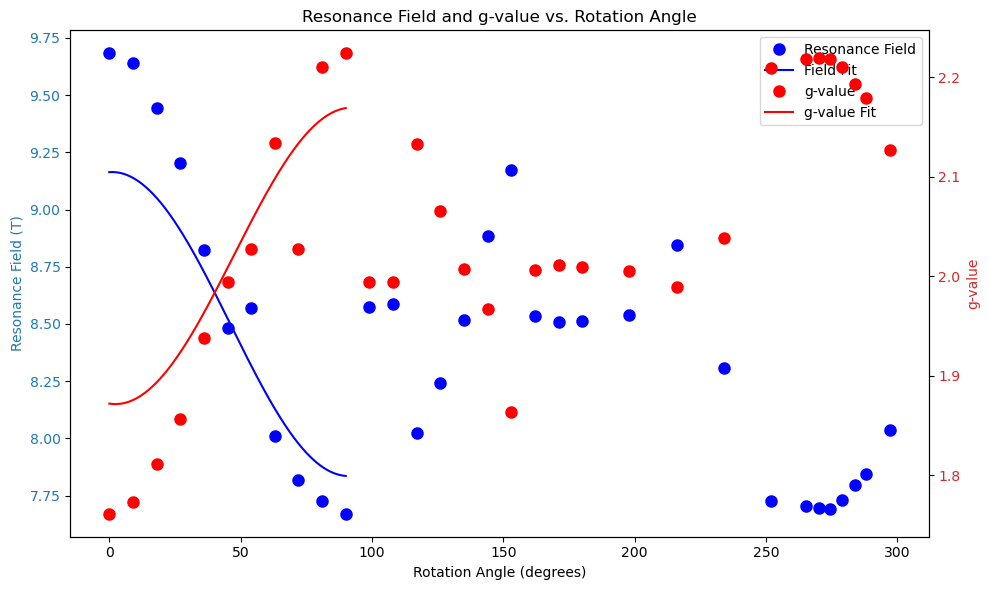

R-squared values:
Resonance Fields: 0.6890384559213729
g-values: 0.6706920330923857


<Figure size 640x480 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
angles_deg = np.array([0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 108, 117, 126, 135,
             144, 153, 162, 171, 180, 198, 216, 234, 252, 265, 270, 274.5, 279,
             284, 288, 297])
resonance_fields = np.array([9.682347316881001, 9.642017145777263, 9.444195623460924, 9.202285819948257,
                    8.823755518280622, 8.483945358092457, 8.56858356465433, 8.012201841731764,
                    7.819712294248432, 7.727209241187028, 7.670889984825133, 8.575219440066512,
                    8.587511639530215, 8.022241804907164, 8.24388824837261, 8.51731631312792,
                    8.88484905675742, 9.17370667942137, 8.535080368506957, 8.510675537795485,
                    8.512338180469643, 8.537929788784158, 8.845689505228451, 8.307719235051222,
                    7.727574953989374, 7.702389840246726, 7.695895136529859, 7.6924283930867015,
                    7.7294634042760855, 7.79598565476783, 7.84576709608045, 8.036464431060923])

g_values = np.array([1.7612, 1.7731, 1.8113, 1.8567, 1.9376, 1.9937, 2.0277, 2.1337, 2.02767, 2.2105, 
                2.2241, 1.9945,1.9937, 2.1334, 2.0651, 2.0075, 1.9666, 1.8630, 2.0064, 2.0115, 2.0096, 
                2.0054, 1.9887, 2.0380, 2.2096, 2.2183, 2.2194, 2.2184, 2.2107, 2.1936, 2.1797, 2.1274])
angles_rad = np.deg2rad(angles_deg)

# Define fitting function
def fit_function(theta, A, phi, B):
    return A * (3 * np.cos(theta - phi)**2 - 1) + B

# Perform the curve fitting for resonance fields
params_fields, _ = curve_fit(fit_function, angles_rad, resonance_fields, p0=[1, 0, 7.7023])
A_fit_fields, phi_fit_fields, B_fit_fields = params_fields

# Perform the curve fitting for g-values
params_g, _ = curve_fit(fit_function, angles_rad, g_values, p0=[0.001, 0, 2.005])
A_fit_g, phi_fit_g, B_fit_g = params_g

# Generate smooth curves for plotting
theta_continuous = np.linspace(0, np.pi/2, 1000)
fitted_fields = fit_function(theta_continuous, A_fit_fields, phi_fit_fields, B_fit_fields)
fitted_g_values = fit_function(theta_continuous, A_fit_g, phi_fit_g, B_fit_g)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot resonance fields
ax1.set_xlabel('Rotation Angle (degrees)')
ax1.set_ylabel('Resonance Field (T)', color='tab:blue')
ax1.plot(angles_deg, resonance_fields, 'bo', label='Resonance Field', markersize=8)
ax1.plot(np.rad2deg(theta_continuous), fitted_fields, 'b-', label='Field Fit')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for g-values
ax2 = ax1.twinx()
ax2.set_ylabel('g-value', color='tab:red')
ax2.plot(angles_deg, g_values, 'ro', label='g-value', markersize=8)
ax2.plot(np.rad2deg(theta_continuous), fitted_g_values, 'r-', label='g-value Fit')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Resonance Field and g-value vs. Rotation Angle')
plt.tight_layout()
plt.show()
fitted_fields_at_points = fit_function(angles_rad, A_fit_fields, phi_fit_fields, B_fit_fields)
fitted_g_at_points = fit_function(angles_rad, A_fit_g, phi_fit_g, B_fit_g)

r2_fields = 1 - np.sum((resonance_fields - fitted_fields_at_points)**2) / np.sum((resonance_fields - np.mean(resonance_fields))**2)
r2_g = 1 - np.sum((g_values - fitted_g_at_points)**2) / np.sum((g_values - np.mean(g_values))**2)

print("R-squared values:")
print("Resonance Fields: " + str(r2_fields))
print("g-values: " + str(r2_g))
plt.savefig("YMnS g-value and resonance Parameter Plot.png")

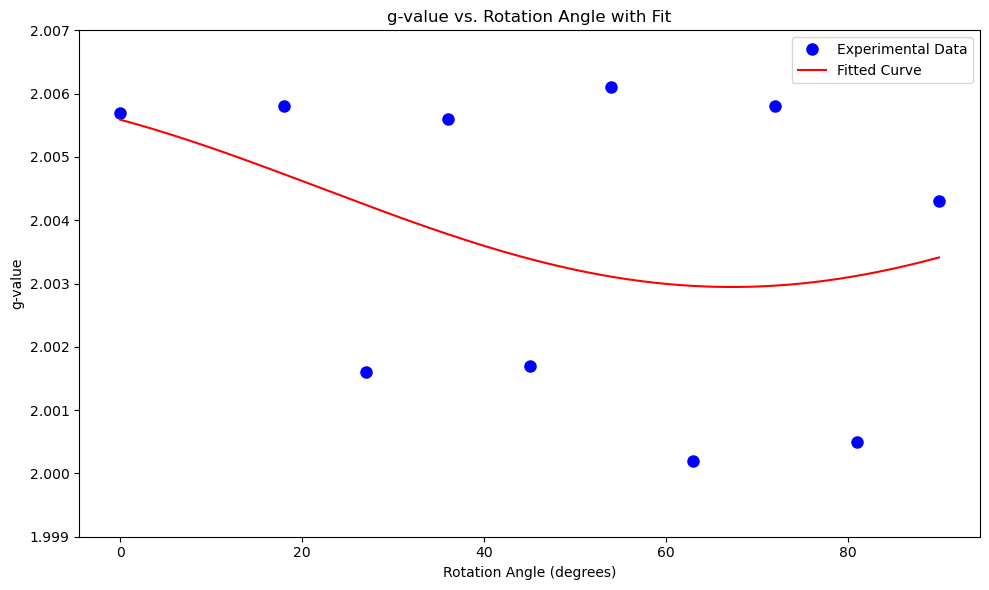

Fitted parameters:
A = 0.001036929765203821
φ = -0.3978019727270528 rad
B = 2.0039821865797274
R-squared = 0.9542284025250852


<Figure size 640x480 with 0 Axes>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
angles_deg = np.array([0, 18, 27, 36, 45, 54, 63, 72, 81, 90])
g_values = np.array([2.0057, 2.0058, 2.0016, 2.0056, 2.0017, 2.0061, 2.0002, 2.0058, 2.0005, 2.0043])
angles_rad = np.deg2rad(angles_deg)

# Define fitting function
def fit_function(theta, A, phi, B):
    return A * (3 * np.cos(theta - phi)**2 - 1) + B

# Perform the curve fitting
initial_guess = [0.001, 0, 2.003]
params, covariance = curve_fit(fit_function, angles_rad, g_values, p0=initial_guess)
A_fit, phi_fit, B_fit = params

# Generate smooth curve for plotting
theta_continuous = np.linspace(0, np.pi/2, 1000)
fitted_g_values = fit_function(theta_continuous, A_fit, phi_fit, B_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(angles_deg, g_values, 'bo', markersize=8, label='Experimental Data')
plt.plot(np.rad2deg(theta_continuous), fitted_g_values, 'r-', label='Fitted Curve')

plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('g-value')
plt.title('g-value vs. Rotation Angle with Fit')
plt.legend()
plt.ylim(1.999, 2.007)

plt.tight_layout()
plt.show()

# Print the fitted parameters and R-squared
print("Fitted parameters:")
print("A = " + str(A_fit))
print("φ = " + str(phi_fit) + " rad")
print("B = " + str(B_fit))
print("R-squared = " + str(r_squared))
plt.savefig("YMnS g-value Parameter Plot.png")